## <h3 align="center"> __Johns Hopkins University__</h3>
## <h3 align="center">__Whiting School of Engineering__</h3>
## <h3 align="center">__Engineering for Professionals__</h3>
## <h3 align="center">__685.701 Data Science: Modeling and Analytics__</h3>
## <h3 align="center">__Programming Assignment 1__</h3>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

### a) Data retrievel

Here I'll be reading in the train and test dataset csvs.

In [2]:
train_data = pd.read_csv('../Datasets/PA1_datasets/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('../Datasets/PA1_datasets/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Since the train dataset contains the target variable, I'll drop it so we just have a dataset containing the features. Here are the features and theie corresponding types in the dataset:

In [4]:
#drop target from dataset
features = train_data.drop(columns=['Survived'])
target = train_data['Survived']

print('The features of this dataset are: \n')
for _ in train_data.columns.values:
    print(_, '--', train_data[_].dtype)


The features of this dataset are: 

PassengerId -- int64
Survived -- int64
Pclass -- int64
Name -- object
Sex -- object
Age -- float64
SibSp -- int64
Parch -- int64
Ticket -- object
Fare -- float64
Cabin -- object
Embarked -- object


We have 11 features, and we can see that PassengerId, Pclass, SibSp, Parch are encoded as ints, Age and Fare are encoded as floats, and Name, Sex, Ticket, Cabin, and Embarked are encoded as objects/strings/categorical variables. 

### b) Feature exploration

Now we can start exploring the dataset. First we should check if there are any missing values in the dataset.

In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see we have 177 missing values for `Age`, 687 missing values for `Cabin`, and 2 missing values for `Embarked`. We will need to consider how to deal with these missing values before performing any analysis. For now, let's look at some exploratory data analysis.

### PassengerId

PassengerId represents the ID number of each passenger. This is presumably unique for each passenger and likely fairly arbitrary, so I predict this feature will not be too useful for any kind of supervised learning models. Here is a brief look at the PassengerId feature:

In [6]:
features['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

We can see each passenger has their own ID, starting at 1 and increasing by 1 for all 891 passengers. This means this feature is not likely to be useful in creating a machine learning model. Since this ID is seemingly arbitrary, this would be a good feature to drop from the dataset before running an analysis.

### PClass

Let's take a look at the next feature, PClass, or passenger class. We will come back to Survived variable later since it is the target variable.

In [7]:
features['Pclass'].unique()

array([3, 1, 2], dtype=int64)

We only have 3 distinct values here, 1st, 2nd, or 3rd class. 

Here is a small function that can help us grab the proportion of each value in the feature as a percentage, although we will also be looking at the raw count values.

In [8]:
#function to print raw count values next to percentages for numerical feature
def get_counts(df, feature):
    counts = df[feature].value_counts().sort_index()
    proportion = round(df[feature].value_counts(normalize=True).sort_index()*100, 2)
    count_df = pd.DataFrame({
        'Counts': counts,
        'Percentage': [str(v) + '%' for v in proportion]
    })
    return count_df

Let's briefly look at the breakdown of passenger classes:

In [9]:
get_counts(features, 'Pclass')

,Counts,Percentage
Pclass,,
1,216,24.24%
2,184,20.65%
3,491,55.11%


Here we can see how many counts we have for each passenger class. We see class 3 has the most, about 55%, while classes 1 and 2 are much closer to 24% and 21%, respectively. From domain knowledge, it would seem likely that passengers in first class would be more likely to have survived than passengers in the lower classes. I think this is a good feature for supervised learning.

We can also check to see the proportion of passengers in each class who survived, from the training set.

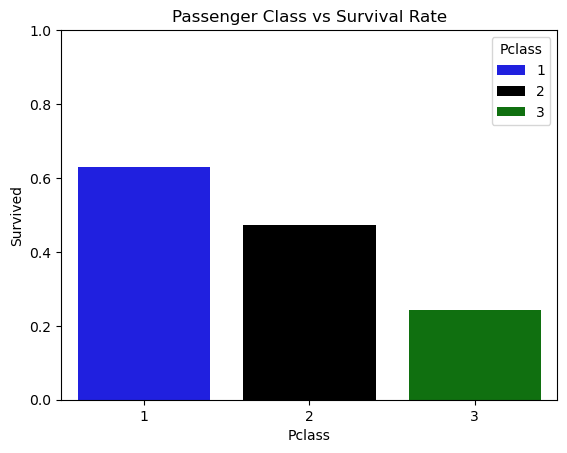

In [10]:
ax =sns.barplot(data=features, x='Pclass', y=target, 
                hue='Pclass', palette=['blue', 'black', 'green'], errorbar=None)
ax.set_title('Passenger Class vs Survival Rate')
plt.ylim(0, 1)
plt.show()

We see about 60% of passengers in first class survived, while about 50% in class 2 and only about 25% in class 3. It seems there is a linear relationship between Pclass and the target variable Survived, and we can use a Pearson's correlation coefficient to determine whether this is true:

In [11]:
from scipy import stats

In [12]:
r, p_value = stats.pearsonr(features['Pclass'], target)

print(f"Pearson's r: {r}")
print(f"P-value: {p_value}")

Pearson's r: -0.3384810359610152
P-value: 2.537047387981485e-25


We do see a moderately strong negative correlation - as Pclass goes up (from 1st class to 2nd to 3rd), survival rate goes down. The p-value also suggests a statistically significant result at the 5% level. Let's press on.

### Name

Now let's look at name, the first categorical variable. Let's look at the unique values.

In [13]:
len(features['Name'].unique())

891

In [14]:
print(features['Name'].unique())
counts = len(features['Name'].unique())
print(f'Unique Names: {counts}')


['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

Similar to Passenger ID, I believe Name is not a good feature to include in analysis, because a person's name is somewhat arbitrary and it would appear that someone named Spencer is just as likely to survive as someone named William. We have a unique name for all passengers in the dataset. 

You could argue names can be correlated with passenger class, which might be somewhat true, although I believe trying to evaluate this feature to make predictions doesn't make much sense when there are better features that will surely be more correlated with the target variable. I don't believe this is a good feature for analysis.

### Sex

Now let's look at Sex. This is another categorical variable. We start by finding out the unique values present.

In [15]:
features['Sex'].unique()

array(['male', 'female'], dtype=object)

We only have 2 values here, Male and Female. Based on domain knowledge, it would seem more likely that Females would have a higher rate of survival than Males, as female passengers would have been more likely to have been offered seats on life rafts. Let's look at the breakdown of passengers by Sex:

In [16]:
get_counts(features, 'Sex')

,Counts,Percentage
Sex,,
female,314,35.24%
male,577,64.76%


We can see roughly 65% of passengers were male and 35% female. Let's see how many passengers survived based on gender.

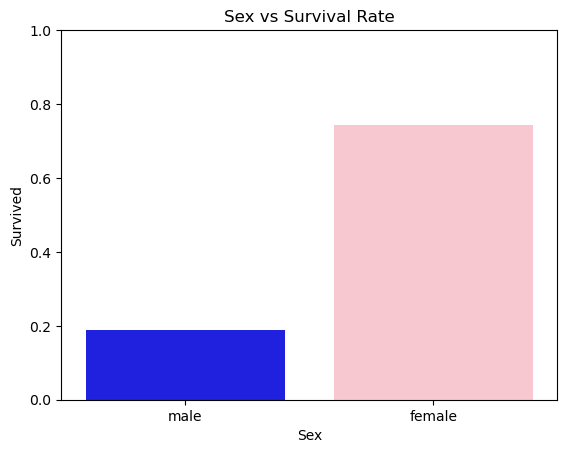

In [17]:
ax =sns.barplot(data=features, x='Sex', y=target, 
                hue='Sex', palette=['blue', 'pink'], errorbar=None)
ax.set_title('Sex vs Survival Rate')
plt.ylim(0, 1)
plt.show()

Despite the much larger population of males onboard, we see about 75% of females survived compared to a much lower rate of about 20% for male passengers. This feature would be good to use for supervised learning, since there is clearly a correlation between sex and survival rate.

### Age

Now we can look at Age. This is the first of 3 features to contain missing values. I think we can start with a description of this feature and a histogram here.

In [18]:
from tabulate import tabulate

In [19]:
age = features['Age'].describe()
df = pd.DataFrame(age)
print(tabulate(df, showindex=True, headers=df.columns, floatfmt='.2f',
                tablefmt='simple'))

          Age
-----  ------
count  714.00
mean    29.70
std     14.53
min      0.42
25%     20.12
50%     28.00
75%     38.00
max     80.00


We see a mean of about 30, while the standard deviation is only 14.5, and the 3rd quartile is 38. This means we likely have several outliers, especially since the max is 80.

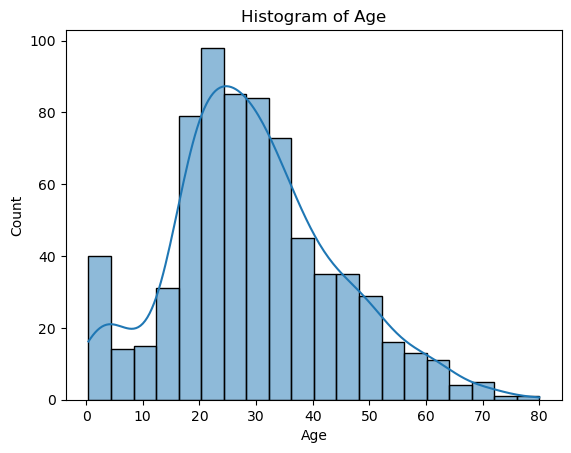

In [20]:
ax = sns.histplot(features['Age'], kde=True, bins=20)
ax.set_title('Histogram of Age')
plt.show()

We see a slightly right skewed histogram. Most passenger ages are between 20-50ish, although to note there are several passengers below the age of 5 (ie babies). We will keep this in mind when we get to looking at Parch and SibSp. Now for the boxplot

A boxplot may help us deduce outliers.

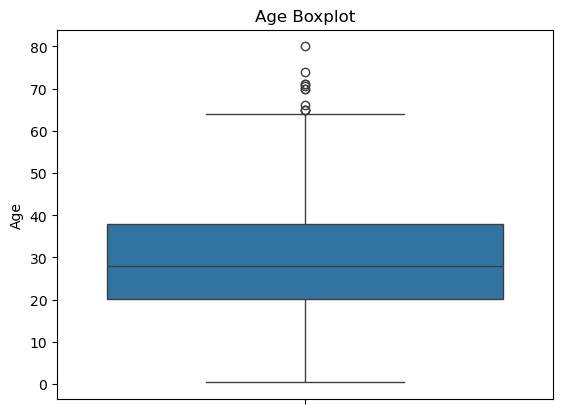

In [21]:
ax = sns.boxplot(y=features['Age'])
ax.set_title('Age Boxplot')
plt.show()

We do in fact see several outliers above the 1.5 x the interquartile range for Age. Remember we have about 177 missing values for age, so we will need to find a way to deal with this before analysis. We should consider how to deal with the outliers as well when choosing a suitable model later. We can finally look at the correlation between Age and survival rate for the records where Age is not missing.

In [22]:
age_df_non_missing = train_data.dropna(subset=['Age'])

r, p_value = stats.pearsonr(age_df_non_missing['Age'], age_df_non_missing['Survived'])

print(f"Pearson's r: {r}")
print(f"P-value: {p_value}")

Pearson's r: -0.07722109457217767
P-value: 0.03912465401348244


For the non missing values of Age, we have a slightly negative correlation. This means as age increases, survival rate goes down slightly, but it's a very weak correlation. The p-value suggests this result is somewhat statistically significant at the 5% level, so it's possible that Age has a non linear relationship with survival rate, since Pearson's r only measures linear relationships. We will keep this mind as we select features for our supervised learning model.

We will skip SibSp, Parch, and Ticket features for now since those features will be explored in the next section. Let's move down to Fare.

### Fare

Fare is another float/continuous variable, similar to Age. We can get some descriptive info as well as visualize a histogram to start.

In [23]:
features['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

No missing values here. The mean was a low price of 32.2, with a relatively high standard deviation of 49.6. The min is 0 while the max is 512. The 3rd quartile, however, is only 31, and so I suspect we have a decent amount of outliers in this feature. Let's take a look at the histogram.

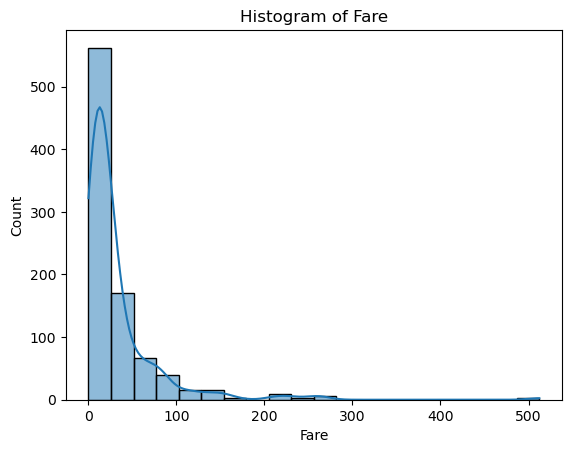

In [24]:
ax = sns.histplot(features['Fare'], kde=True, bins=20)
ax.set_title('Histogram of Fare')
plt.show()

Just as suspected, we have only a few values of Fare above the 100-150 range. Let's check the boxplot next.

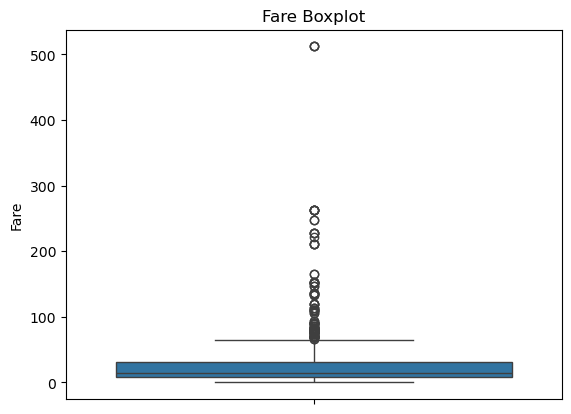

In [25]:
ax = sns.boxplot(y=features['Fare'])
ax.set_title('Fare Boxplot')
plt.show()

No surprises here, there are a lot of outliers in this feature, so this feature may need to be transformed or handled differently before feeding it into a model. Finally, let's look at the correlation with the target variable.

In [26]:
r, p_value = stats.pearsonr(features['Fare'], target)

print(f"Pearson's r: {r}")
print(f"P-value: {p_value}")

Pearson's r: 0.2573065223849624
P-value: 6.120189341924608e-15


We see a moderate positive correlation between Fare and Survival. This would make sense, since passengers who paid more were more likely to be in 1st class, and we already saw that Pclass and Survival had a moderately negative correlation. The p-value also indicates this result is statistically significant at the 5% level.

### Cabin

Now we have Cabin, the second feature with missing values. Let's see how many unique values we have

In [27]:
print(features['Cabin'].unique())
counts = len(features['Cabin'].unique())
print(f'Unique Names: {counts}')

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
Unique Names: 148


We see 148 unique cabin values. Note though that some values are single rooms such as 'C85', where others are grouped together, such as 'C23 C25 C27', or 'D10 D12'. These could be connected rooms or suites with multiple rooms which is why they're listed this way. 

Let's check the ratio between missing and non missing values for this feature

In [28]:
missing = features['Cabin'].isnull().sum()
not_missing = features['Cabin'].notna().sum()
print(f'Number of missing values in Cabin: {missing}')
print(f'Number of non missing values in Cabin: {not_missing}')

Number of missing values in Cabin: 687
Number of non missing values in Cabin: 204


We see 687 missing values and only 204 values in Cabin, out of 891 that's roughly 77% of the total values. Since the majority of this feature is missing, I don't think it would be useful to include into a supervised learning model, since we can't accurately make a prediction using the Cabin number.

### Embarked

Next we have Embarked or ports where passengers boarded, which is another categorical variable. This is also the last feature to contain missing values, although only 2 records are missing. Let's take a look at the unique values at the proportion of each that we have.

In [29]:
features['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Only 3 unique values here, similar to Pclass. We have S = Southhampton, C = Cherbourg, and Q = Queenstown. Let's look at the breakdown of values in the dataset.

In [30]:
get_counts(features, 'Embarked')

,Counts,Percentage
Embarked,,
C,168,18.9%
Q,77,8.66%
S,644,72.44%


Around 72% of passengers boarded in Southhampton, 18.9% in Cherbourg, and only 8.6% in Queenstown. We can 

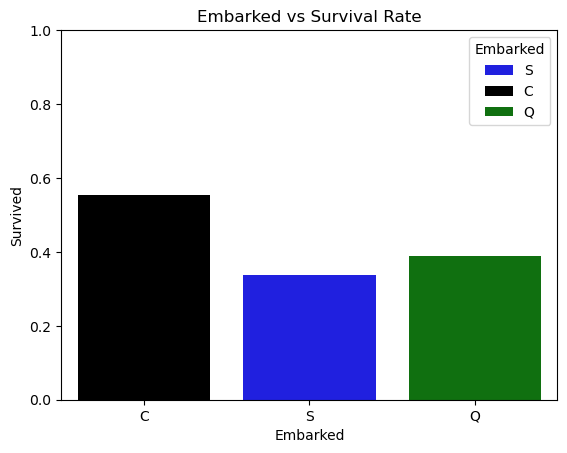

In [31]:
ax =sns.barplot(data=features, x='Embarked', y=target, 
                hue='Embarked', palette=['blue', 'black', 'green'], errorbar=None,
                order=['C', 'S', 'Q'])
ax.set_title('Embarked vs Survival Rate')
plt.ylim(0, 1)
plt.show()

There was a much higher survival rate for passengers who boarded at Cherbourg, while Queenstown survival rate was only slightly higher than Southhampton. Since these ports were in different countries, it's possible the difference in survival rate can be linked to Fare price or perhaps Pclass. This might be a good feature to use for supervised learning.

### Survived

Finally we have the target variable, Survived. This states whether the recorded passenger survived or not, with 0 being did not survive and 1 being did survive. This is a binary categorical variable, so we should use classifier models to make predictions for this dataset. Let's check the breakdown.

In [32]:
get_counts(train_data, 'Survived')

,Counts,Percentage
Survived,,
0,549,61.62%
1,342,38.38%


We see that 61.6% of passengers did not survive, while 38.4% did survive. Our goal is to correctly train a supervised learning model to make predictions on who will survive using unseen test data, given relevantly correlated features with survival rate.

To summarize the intial EDA, I believe that Pclass and Sex are features definitely worth starting with. Age, Fare and Embarked are slightly lower of a priority, depending on how we impute missing values, whether we need to consider binning/ creating new features, or how sensitive the model we choose is to outliers. I think we can drop PassengerId, Name, and Cabin. 

Finally, there are a few features we haven't yet considered that we will look at in the next section: SibSp, Parch, and Ticket.

### c) Feature exploration (continued)

### SibSp

SibSp is our next feature, which indicates the number of siblings or spouses aboard. This is another integer variable, although discrete instead of continuous, so we can look at a barchart instead of a histogram.

In [33]:
features['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

We see the min is 0 and the max is 8, while the 3rd quartile is only 1. Clearly the max is an outlier, but let's look at some visuals to get a better idea.

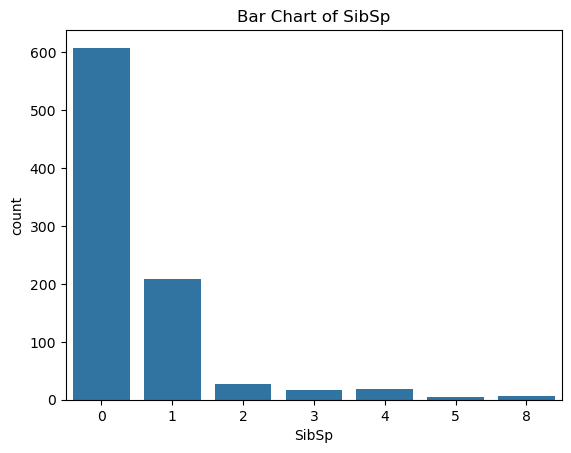

In [34]:
ax = sns.countplot(data=features, x='SibSp')
ax.set_title('Bar Chart of SibSp')
plt.show()

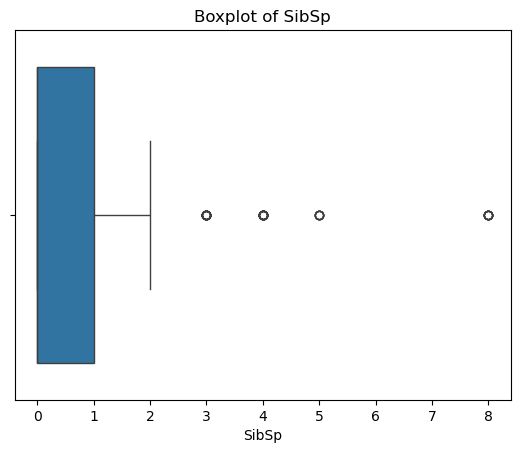

In [35]:
ax = sns.boxplot(x=features['SibSp'])
ax.set_title('Boxplot of SibSp')
plt.show()

We see the most frequent value is 0, which makes sense with the 3rd quartile being 1. Our boxplot would indicate that values of 3 or more could be considered outliers. We can also get our handy breakdown of each value from our handy `get_counts` function.

In [36]:
get_counts(features, 'SibSp')

,Counts,Percentage
SibSp,,
0,608,68.24%
1,209,23.46%
2,28,3.14%
3,16,1.8%
4,18,2.02%
5,5,0.56%
8,7,0.79%


About 68% had 0 siblings or spouses aboard, while 32% had at least 1 or more. Notably, there are no values of 6 or 7, but several values of 8. Finally we can use Pearson's r to find the correlation between SibSp and survival rate.

In [37]:
r, p_value = stats.pearsonr(features['SibSp'], target)

print(f"Pearson's r: {r}")
print(f"P-value: {p_value}")

Pearson's r: -0.03532249888573553
P-value: 0.29224392869829624


We see a fairly week negative correlation between SibSp and survival. Our p-value is fairly high, so at the 5% level this would indicate these results are not statistically significant. Finally we can compare this feature against survival rate as a bar chart.

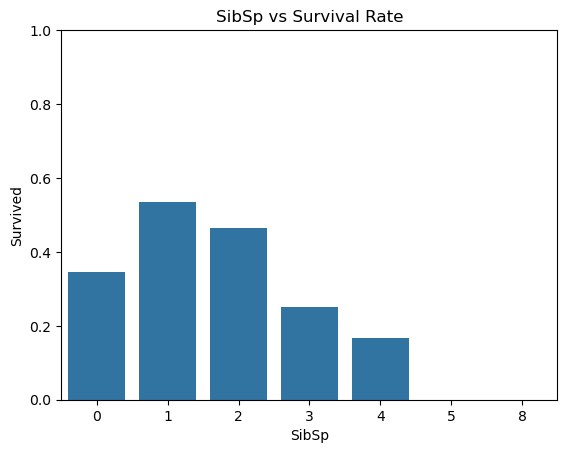

In [38]:
ax =sns.barplot(data=features, x='SibSp', y=target, 
                 errorbar=None,
                )
ax.set_title('SibSp vs Survival Rate')
plt.ylim(0, 1)
plt.show()

We see passengers with 1 sibling or spouse had the highest survival rate, while passengers with more than that had less of a survival rate. Let's look at a related feature next, Parch.

### Parch

Parch describes the number of parents and/or children aboard. Similar to SibSp, this is an integer variable with discrete values, so we can look at the same metrics.

In [39]:
features['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

Again we have only a few distinct values here, with 6 being the highest. The 3rd quartile is 0, so once again the max will be an outlier, which we can visually confirm on our visual charts.

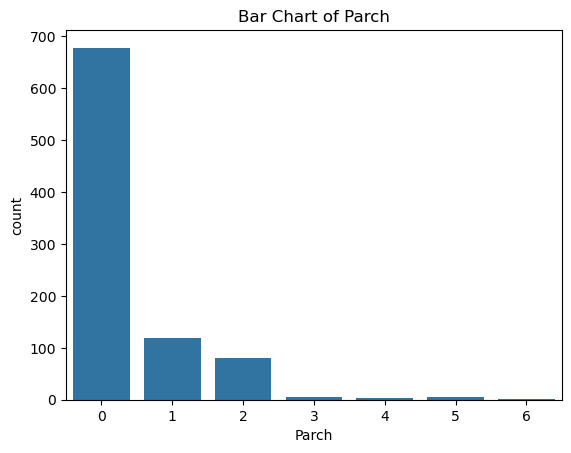

In [40]:
ax = sns.countplot(data=features, x='Parch')
ax.set_title('Bar Chart of Parch')
plt.show()

Most passengers had no parents or children on board, while only around 100 or so had 1, and even fewer had 2 or more, although no values from 1-6 are not accounted for, unlike SibSp.

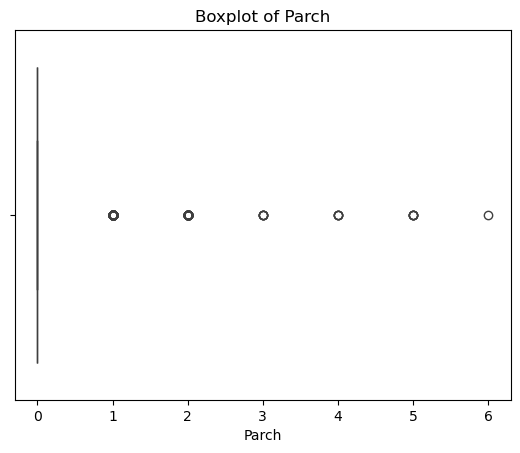

In [41]:
ax = sns.boxplot(x=features['Parch'])
ax.set_title('Boxplot of Parch')
plt.show()

Nothing too interesting here, although of course this plot doesn't show too much we didn't identify from the previous metrics. Let's look at the breakdown of values next.

In [42]:
get_counts(features, 'Parch')

,Counts,Percentage
Parch,,
0,678,76.09%
1,118,13.24%
2,80,8.98%
3,5,0.56%
4,4,0.45%
5,5,0.56%
6,1,0.11%


76% of passengers had no parents of children on board, while only 13% had 1 and even fewer with 2 or more. Notably only one passenger had a record of 6.

In [43]:
r, p_value = stats.pearsonr(features['Parch'], target)

print(f"Pearson's r: {r}")
print(f"P-value: {p_value}")

Pearson's r: 0.08162940708348349
P-value: 0.014799245374727947


We see a weak positive correlation between Parch and survival rate, and the p-value of 0.01 indicates there is a somewhat statistically significant result at the 5% level. This may be a good feature to choose when selecting features for the model.

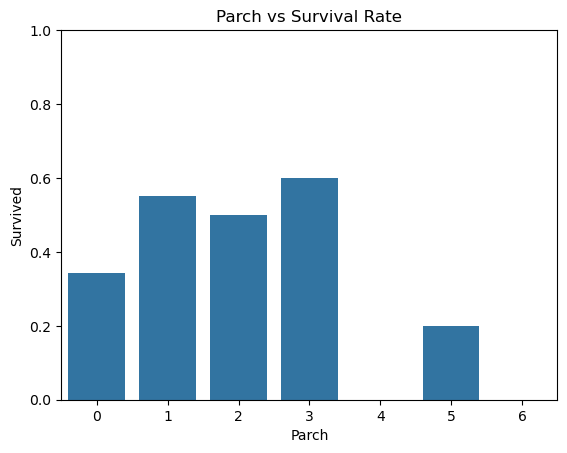

In [44]:
ax =sns.barplot(data=features, x='Parch', y=target, 
                 errorbar=None,
                )
ax.set_title('Parch vs Survival Rate')
plt.ylim(0, 1)
plt.show()

Finally we have the feature against survival rate. Passengers with 3 parents and children had the highest survival rate, while those with 1 and then 2 were not far behind.

### Ticket

Ticket is the last feature yet to be evaluated. This is another categorical value so let's start by finding the unique values in the dataset.

In [45]:
print(features['Ticket'].unique())
counts = len(features['Ticket'].unique())
print(f'Unique Names: {counts}')

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349215' '35281' '

We see 681 unique values, out of 891 passengers. This makes sense since families would likely be on the same ticket number. Notice that there are a mix of values that are simply numbers encoded as strings, and letters along with numbers encoded as a string. Ticket numbers would likely be arbitrary and maybe depend on date or time of purchase. Due to the number of unique values, seemingly arbitary values, and mix of letters and numbers encoded, I don't believe Ticket would make a good predictor for the target variable. I will choose to drop this feature from the dataset.

Let's preprocess SibSp and Parch by creating a new addition term called family_size which adds these values together. I would assume that people with larger families were less likely to survive, given they would want to stick together, vs an 'every man for himself' approach for lone travellers.

In [46]:
train_data['Family_size'] = train_data['Parch'] + train_data['SibSp']
test_data['Family_size'] = test_data['Parch'] + test_data['SibSp']

Let's check whether Cabin is highly correlated with PClass. We can use a crosstab to check the frequencies of the combination of values for both features.

In [47]:
result = pd.crosstab(train_data['Cabin'], train_data['Pclass']).apply(lambda x: x/len(train_data), axis=1)
print(result)

Pclass         1         2         3
Cabin                               
A10     0.001122  0.000000  0.000000
A14     0.001122  0.000000  0.000000
A16     0.001122  0.000000  0.000000
A19     0.001122  0.000000  0.000000
A20     0.001122  0.000000  0.000000
...          ...       ...       ...
F33     0.000000  0.003367  0.000000
F38     0.000000  0.000000  0.001122
F4      0.000000  0.002245  0.000000
G6      0.000000  0.000000  0.004489
T       0.001122  0.000000  0.000000

[147 rows x 3 columns]


We can't see much here, let's try a heatmap.

<Axes: xlabel='Pclass', ylabel='Cabin'>

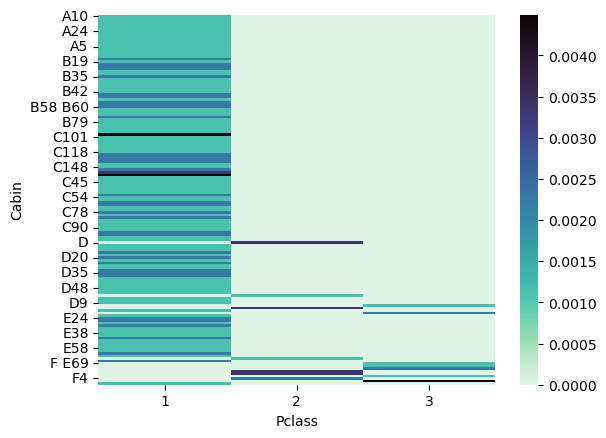

In [48]:
sns.heatmap(result, cmap=sns.cm.mako_r)

Again, it's difficult to see because of how many unique values we have in Cabin. Although we do see that 1st class passengers were more likely to be in A-C-level cabins, while the lower classes were more likely to be in D-F level cabins.

Finally we can try a chi squared test for independence for 2 categorical variables.

In [49]:
from scipy.stats import chi2_contingency

In [50]:
crosstab = pd.crosstab(train_data['Cabin'], train_data['Pclass'])

In [51]:
chi2, p_value, deg_freedom, expected_freq = chi2_contingency(crosstab)

In [52]:
print(f'Chi-square statistic: {chi2:.3f}')
print(f'P-value: {p_value:.8f}')
print(f'Degrees of freedom: {deg_freedom}')

Chi-square statistic: 408.000
P-value: 0.00000827
Degrees of freedom: 292


https://www.medcalc.org/manual/chi-square-table.php

According to the chi-square table, which can be found in the link above, for 292 degrees of freedom, we would reject the null hypothesis for a chi-square statistic above roughly 341. Since our chi-square statistic is 408, we would in fact reject the null hypothesis, and conclude that this result is statistically significant. Therefore, Cabin and Pclass are in fact correlated with each other.

Due to the amount of missing data and unique values in Cabin, however, I believe it should still be dropped from the dataset before performing supervised learning.

In [53]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_size      0
dtype: int64

In [54]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family_size      0
dtype: int64

### Missing Values

Let's handle the missing values. There are 3 features with missing values, Age, Cabin, and Embarked. For Age, the missing values are likely missing not at random, since older passengers may not have been as likely to report their age, or the missing ages were more related to lower class passengers, since their records were probably not handled as carefully as 1st class passengers. We will try Multiple Imputation by Chained Equations (MICE) to impute age. For Cabin, we will drop the feature, so no need to impute, and for Embarked we can simply use mode imputation, since there are only 2 missing values in Embarked. Since Fare is missing a value we can use median imputation here.

In [55]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [56]:
#create copies so as not to alter original data
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

#get columns with numeric missing values
train_missing_df = train_data_copy.loc[:, ['Age']]
test_missing_df = test_data_copy.loc[:, ['Age']]

In [57]:
#create imputer and fit to training data
imputer = IterativeImputer(random_state=42, max_iter=10)
imputed_vals = imputer.fit(train_missing_df)

In [58]:
#impute the values in both train and test sets
train_imputed = imputer.transform(train_missing_df)
test_imputed = imputer.transform(test_missing_df)

#create dataframe for imputed values
train_imputed_df = pd.DataFrame(train_imputed, columns=train_missing_df.columns)
test_imputed_df = pd.DataFrame(test_imputed, columns=test_missing_df.columns)

In [59]:
#original columns with missing data will be replaced by newly imputed columns
train_data.loc[:, ['Age']] = train_imputed_df
test_data.loc[:, ['Age']] = test_imputed_df

In [60]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_size      0
dtype: int64

We can see we now have no missing values for Age. Let's look at the test data to confirm as well.

In [61]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family_size      0
dtype: int64

In [62]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


We have no missing values for age in the test data. We do see a missing value for Fare, but since it's only one we can get away with median imputation there. Cabin we will drop from the dataset.

Let's handle Cabin and Embarked next. For Cabin, we are dropping this feature as it has too many missing values and too many unique values to be meaningful in a supervised learning model. We will also drop PassengerId and the target variable from the training set, Survived.

In [63]:
target = train_data['Survived']
train_data = train_data.drop(columns=['PassengerId', 'Survived', 'Cabin', 'Ticket'])
test_data = test_data.drop(columns=['PassengerId', 'Cabin', 'Ticket'])

In [64]:
train_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [65]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2


To finish handling missing values, we will mode impute the Embarked feature for the training set, since there are only a few values, while we will median impute the Fare feature in the test set, since there are only a few values there.

In [66]:
# Find the most common value (mode) in Embarked column
mode_embarked = train_data['Embarked'].mode()[0]  # Mode returns a Series, so we take the first value

# Fill missing values with the mode
train_data.fillna({'Embarked': mode_embarked}, inplace=True)

In [67]:
median_fare = train_data['Fare'].median()

test_data.fillna({'Fare': median_fare}, inplace=True)

Now we should have no missing values in the train or test set.

In [68]:
train_data.isnull().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [69]:
test_data.isnull().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Family_size    0
dtype: int64

Excellent, we've successfully handled the missing values. We can move on to scaling and one hot encoding.

### d/e) Feature processing

We start by scaling the continuous numeric features, which are Age and Fare. This is best done before one hot encoding so we don't accidentally scale the one hot encoded features. The features like SibSp and Parch with only a few distinct values are not necessary to scale.

In [70]:
from sklearn.preprocessing import StandardScaler

In [ ]:


# Identify numeric columns
scaled_columns = ['Age', 'Fare']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform only numeric columns
train_data[scaled_columns] = scaler.fit_transform(train_data[scaled_columns])
test_data[scaled_columns] = scaler.transform(test_data[scaled_columns])

We have several categorical variables - Name, Sex, and Embarked. We will need to one hot encode these variables before we run our supervised learning models.

In [72]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
# Select categorical features
categorical_features = ['Name', 'Sex', 'Embarked']

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Fit on train set and transform both train and test sets
train_encoded = encoder.fit_transform(train_data[categorical_features])
test_encoded = encoder.transform(test_data[categorical_features])  # Transform only (no fitting on test)

# Convert to DataFrame
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_features))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Reset index to match original DataFrames
train_encoded_df.index = train_data.index
test_encoded_df.index = test_data.index

# Drop original categorical features and concatenate encoded features
train_data = pd.concat([train_data.drop(columns=categorical_features), train_encoded_df], axis=1)
test_data = pd.concat([test_data.drop(columns=categorical_features), test_encoded_df], axis=1)


c:\Users\jjhir\anaconda3\envs\modeling_ayl\lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


After successfully one hot encoding our data, we can check that all of the variables are numbers, including the name feature, in both the training and test sets.

In [74]:
train_data.head()

,Pclass,Age,SibSp,Parch,Fare,Family_size,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,"Name_Zimmerman, Mr. Leo","Name_de Messemaeker, Mrs. Guillaume Joseph (Emma)","Name_de Mulder, Mr. Theodore","Name_de Pelsmaeker, Mr. Alfons","Name_del Carlo, Mr. Sebastiano","Name_van Billiard, Mr. Austin Blyler","Name_van Melkebeke, Mr. Philemon",Sex_male,Embarked_Q,Embarked_S
0,3,-0.592481,1,0,-0.502445,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,0.638789,1,0,0.786845,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-0.284663,0,0,-0.488854,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0.407926,1,0,0.420730,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,0.407926,0,0,-0.486337,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [75]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Family_size,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,"Name_Zimmerman, Mr. Leo","Name_de Messemaeker, Mrs. Guillaume Joseph (Emma)","Name_de Mulder, Mr. Theodore","Name_de Pelsmaeker, Mr. Alfons","Name_del Carlo, Mr. Sebastiano","Name_van Billiard, Mr. Austin Blyler","Name_van Melkebeke, Mr. Philemon",Sex_male,Embarked_Q,Embarked_S
0,3,0.369449,0,0,-0.490783,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,3,1.331378,1,0,-0.507479,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,2.485693,0,0,-0.453367,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3,-0.207709,0,0,-0.474005,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,3,-0.592481,1,1,-0.401017,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We see all numeric columns. The name columns should be dropped since they will not contribute to the supervised learning models in any meaningful way, so to finalize the preprocessing steps, I will drop those columns from the train and test sets.

In [76]:
# Get the encoded column names
encoded_name_columns_train = [col for col in train_data.columns if 'Name_' in col]
encoded_name_columns_test = [col for col in test_data.columns if 'Name_' in col]

# Drop the original Name column and its one-hot encoded columns
train_data.drop(columns=encoded_name_columns_train, inplace=True)
test_data.drop(columns=encoded_name_columns_test, inplace=True)


We can see that we now have only the relevant features in both the train and test sets that we will use for our machine learning models. All the features are numeric since we have one hot encoded the categorical variables, and no missing values are present. We are ready to create the models.

In [77]:
train_data.head()

,Pclass,Age,SibSp,Parch,Fare,Family_size,Sex_male,Embarked_Q,Embarked_S
0,3,-0.592481,1,0,-0.502445,1,1.0,0.0,1.0
1,1,0.638789,1,0,0.786845,1,0.0,0.0,0.0
2,3,-0.284663,0,0,-0.488854,0,0.0,0.0,1.0
3,1,0.407926,1,0,0.420730,1,0.0,0.0,1.0
4,3,0.407926,0,0,-0.486337,0,1.0,0.0,1.0


In [78]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Family_size,Sex_male,Embarked_Q,Embarked_S
0,3,0.369449,0,0,-0.490783,0,1.0,1.0,0.0
1,3,1.331378,1,0,-0.507479,1,0.0,0.0,1.0
2,2,2.485693,0,0,-0.453367,0,1.0,1.0,0.0
3,3,-0.207709,0,0,-0.474005,0,1.0,0.0,1.0
4,3,-0.592481,1,1,-0.401017,2,0.0,0.0,1.0


## Supervised Learning

In [79]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

### a) Model development

The three supervised machine learning models I'm choosing to develop are K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Random Forest Classifier.

In [80]:

# Split the train data into 50% training and 50% validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data, target, test_size=0.5, random_state=42, stratify=target)

In [ ]:
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', gamma=0.5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


for name, model in classifiers.items():

    #create pipeline for each model
    pipeline = Pipeline([
        ('classifier', model)
    ])

    #train model on training data
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    
    print(f'{name} Accuracy: {accuracy:.4f}')


KNN Accuracy: 0.7982
SVM Accuracy: 0.8094
Random Forest Accuracy: 0.7848


The KNN model has an accuracy of 80%. We will likely need to tune the number of neighbors for this model. SVM accuracy is slightly higher at 81%, using a radial basis function kernel. Again we will need to use hyperparameter tuning here. Random Forest was a bit lower with 78% accuracy.

### b) Hyperparameter Optimization

Now we can tune our models with hyperparameter tuning. Note that GridSearchCV handles cross validation internally, and so we do not need to split the data again into train, test, and validation sets.

In [82]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier()
}

# Define hyperparameters for GridSearchCV
param_grid = {
    'KNN': {'classifier__n_neighbors': [3, 5, 7]},
    'SVM': {'classifier__kernel': ['linear', 'rbf', 'poly'], 'classifier__gamma': [0.001, 0.01, 0.1, 1]},
    'RandomForest': {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [None, 10]}
}

best_models = {}

# Create pipeline template
for name, model in classifiers.items():
    pipeline = Pipeline([
        ('classifier', model)  # Classifier placeholder
    ])
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Evaluate model
    y_pred = grid_search.best_estimator_.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    #add to dict of best models
    best_models[f'{name}'] = grid_search.best_estimator_

    print(f'{name} Best Parameters: {grid_search.best_params_}')
    print(f'{name} Test Accuracy: {accuracy:.4f} \n')



KNN Best Parameters: {'classifier__n_neighbors': 7}
KNN Test Accuracy: 0.7915 

SVM Best Parameters: {'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
SVM Test Accuracy: 0.8386 

RandomForest Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
RandomForest Test Accuracy: 0.8139 



SVM and random forest accuracies went up a bit after hyperparameter tuning.

### c) Evaluate model performance

We just saw the accuracy for each model. Let's visualize the ROC and AUC scores between all 3 models to evaluate and decide which to use.

In [84]:

from sklearn.metrics import roc_curve, roc_auc_score


Training KNN...
Accuracy: 0.7915
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       275
           1       0.75      0.69      0.72       171

    accuracy                           0.79       446
   macro avg       0.78      0.77      0.78       446
weighted avg       0.79      0.79      0.79       446

AUC Score: 0.8309

Training SVM...
Accuracy: 0.8386
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       275
           1       0.83      0.73      0.78       171

    accuracy                           0.84       446
   macro avg       0.84      0.82      0.83       446
weighted avg       0.84      0.84      0.84       446

AUC Score: 0.8483

Training RandomForest...
Accuracy: 0.8094
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       275
           1       0.

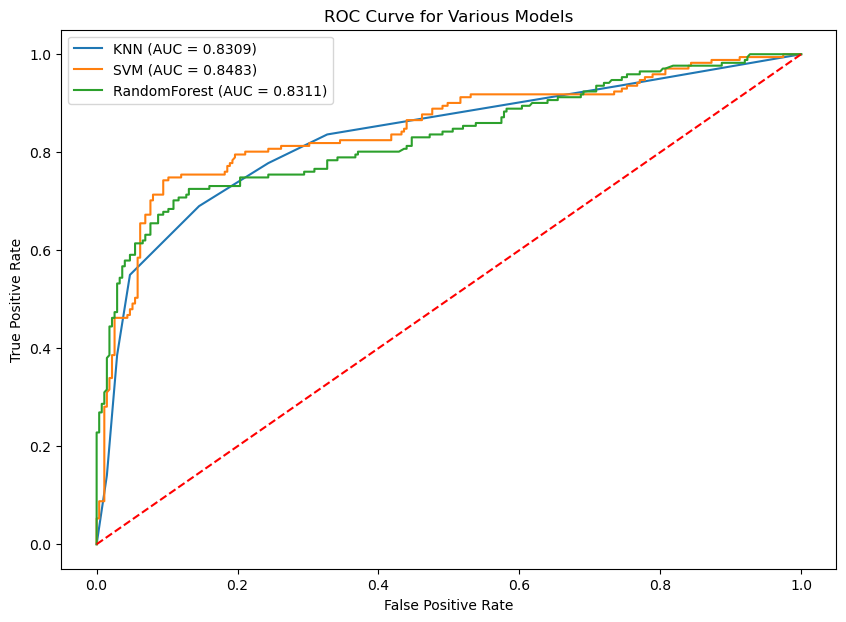

In [85]:


# Define models
models = best_models

# Store results
model_results = {}

# Evaluate each model
plt.figure(figsize=(10, 7))  # ROC curve plot setup

for name, model in models.items():
    print(f'\nTraining {name}...')
    
    # Train the model
    
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_val)
    y_pred_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_val)

    # Compute metrics
    accuracy = accuracy_score(y_val, y_pred)
    class_report = classification_report(y_val, y_pred)
    auc_score = roc_auc_score(y_val, y_pred_prob)

    # Print results
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Classification Report:\n{class_report}')
    print(f'AUC Score: {auc_score:.4f}')

    # Store results
    model_results[name] = {
        'predictions': y_pred,
        'accuracy': accuracy,
        'classification_report': class_report,
        'auc_score': auc_score
    }

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_pred_prob)

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

# Finalize ROC Curve plot
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Various Models')
plt.legend()
plt.show()


In terms of accuracy, SVM has the highest. However, random forest is not too far behind.

KNN on the other hand had overall lower accuracy, F1 scores, and AUC score, though still not too much lower than the other two. 

I think either random forest or SVM would work well here, but I will choose SVM.

## Submit to Competition

### a) Kaggle submission preparation

Here we are preparing the pipeline and test predictions for our best models. For the 5 submissions in part b, I will use SVM 3 times with different hyperparameters, KNN, and random forest models. Here though, I am preparing the predictions using the best SVM model we found via hyperparameter tuning.

Since we already trained this model in the previous part, I will just use the predictions from that pipeline and model results.

In [86]:
y_pred_best_svm = model_results['SVM']['predictions']

In [87]:
svm_acc = model_results['SVM']['accuracy']
print(f'Accuracy of best SVM model: {svm_acc:.4f}')

Accuracy of best SVM model: 0.8386


Note slightly different accuracies can occur here due to SVM being stochastic in nature (depending on the kernel used).

### b) Kaggle submission

Finally let's submit to kaggle and change some hyperparamters and models to compare with the best SVM model we trained.

In [88]:
df_test = pd.read_csv('../Datasets/PA1_datasets/test.csv')

In [89]:
def save_preds(_fn, _y_pred, _df):
    import csv
    with open(_fn, 'w') as fout:
        writer = csv.writer(fout, delimiter=',', lineterminator='\n')
        writer.writerow(['PassengerId', 'Survived'])
        for yid, ypred in zip(_df['PassengerId'], _y_pred):
            writer.writerow([yid, int(ypred)])

In [90]:
save_preds('predictions_best_svm.csv', y_pred_best_svm, df_test)

Scored: 0.58851

The best hyperparameters for SVM were rbf kernel and gamma of 0.1. Let's vary two svm models by changing these parameters.

In [91]:
model_svm2 = SVC(kernel='linear', gamma=0.6)
model_svm3 = SVC(kernel='rbf', gamma=1)

model_svm2.fit(X_train, y_train)
model_svm3.fit(X_train, y_train)

# Predictions
y_pred_svm2 = model_svm2.predict(X_val)
y_pred_svm3 = model_svm3.predict(X_val)

# Compute metrics
accuracy_svm2 = accuracy_score(y_val, y_pred_svm2)
accuracy_svm3 = accuracy_score(y_val, y_pred_svm3)

print(f'Accuracy of best SVM2 model: {accuracy_svm2*100:.2f} %')
print(f'Accuracy of best SVM3 model: {accuracy_svm3*100:.2f} %')

Accuracy of best SVM2 model: 79.82 %
Accuracy of best SVM3 model: 77.58 %


We see slightly lower accuracies for these models.

In [92]:
save_preds('predictions_svm2.csv', y_pred_svm2, df_test)

Scored: 0.59090

In [93]:
save_preds('predictions_svm3.csv', y_pred_svm3, df_test)

Scored: 0.57416

In [94]:
y_pred_best_knn = model_results['KNN']['predictions']
save_preds('predictions_best_knn.csv', y_pred_best_knn, df_test)

Scored: 0.55980

In [95]:
y_pred_best_rf = model_results['RandomForest']['predictions']
save_preds('predictions_best_rf.csv', y_pred_best_rf, df_test)

Scored: 0.58612

### Summary

The best score of the 5 was the second SVM model, with a linear kernel and gamma of 0.6. During hyperparameter tuning, the best model was fluctuating between using a linear and rbf kernel, so I'm not surprised. This might indicate the dataset has linear separation boundaries. The KNN model had the lowest score, although all were around 56-60%. 

Overall we see scores that are on average lower than what we hoped to achieve. This could be due to a number of reasons, but likely the models need more preprocessing to acheieve higher scores. Things I think could be improved are creating more new features that are better predictors of survival or transforming some existing features, perhaps binning age for example. Also changing the train-test split size may have had an effect on how much data the models were seeing, and perhaps they were not able to generalize well enough on unseen data since we only trained on 50% of the available data instead of a more common 80-20 split.

We could also improve in areas of feature engineering by using feature selection methods to reduce the dimensionality and avoid overfitting the models - one step I didn't implement. There is room for improvement certainly, but considering the scores are above 50%, which would imply only random guessing for a binary variable, this was a good start.